In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

[[ 0.9944479  -1.51666697]
 [-0.3404792  -0.39546072]
 [-0.92978    -1.44854911]
 ...
 [-2.91953119 -1.96829635]
 [ 0.1717912  -1.53408936]
 [-2.54105874 -1.67856635]]
[0 1 1 ... 1 0 1]


[0 1 0 ... 1 0 0]


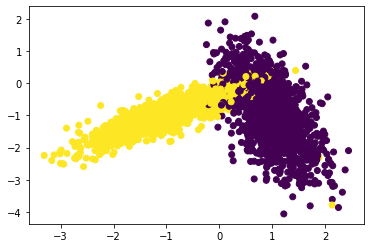

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

print(x)
print(y)
print('\n')
print(y_test)

colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

<pre>
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    
    
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows
        
        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies
          
        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies
          
        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure
        
        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

#5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
#6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
#7. plot the decision boundaries for the model initialized with the best hyperparameter, as shown in the last cell of reference notebook

</pre>

In [3]:
from sklearn.metrics import accuracy_score


def fold_split(folds,x_train):
    x=len(x_train)//folds
    lst=[]
    sample_indxs=random.sample(range(0, len(x_train)), len(x_train)-1)
    #print(sample_indxs)
    lst=[]
    lst = [sample_indxs[i:i+x] for i in range(0,len(x_train),x)]
    
    #print(lst)
    #print('\n')
    #print(len(sample_indxs))
    #print(len(lst))
    
    return lst

     

def RandomSearchCV(x_train,y_train,classifier, params, folds):
    train_scores = []
    test_scores  = [] 
    a=fold_split(folds,x_train) #splitting data inta into folds #of folds
    for k in tqdm(params['n_neighbors']):  #for every neighbor in params['n_neighbors']
        train_scores_folds = []
        test_scores_folds  = []
        
        
        #print(a)
        #print(len(a))
        #print(a.values())
        #print(type(a[0]))
        #print(a[0])
        #print(list(a[0]))
        
        
        for i in range(0, folds): #for every folds in folds
            
            
            
            
            test_indices  = list(a[i]) #storing a[i] values to test_indices
            train_indices =list(set(list(range(1, len(x_train)))) - set(test_indices))#subtracting test indices from entire dataset so that we get train indices
            
            

            # selecting the data points based on the train_indices and test_indices
            X_train = x_train[train_indices]
            Y_train = y_train[train_indices]
            X_test  = x_train[test_indices]
            Y_test  = y_train[test_indices]

            classifier.n_neighbors = k
            classifier.fit(X_train,Y_train)

            Y_predicted = classifier.predict(X_test)
            test_scores_folds.append(accuracy_score(Y_test, Y_predicted))

            Y_predicted = classifier.predict(X_train)
            train_scores_folds.append(accuracy_score(Y_train, Y_predicted))
            
                
        train_scores.append(np.mean(np.array(train_scores_folds))) #appending mean scores that we got at every fold iteration
        test_scores.append(np.mean(np.array(test_scores_folds)))
    return train_scores,test_scores
    

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

{'n_neighbors': [8, 13, 14, 15, 17, 20, 26, 34, 39, 49]}


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.02s/it]


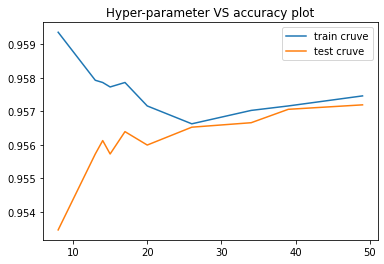

In [4]:

from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
random.seed(19)
import warnings
warnings.filterwarnings("ignore")


neigh = KNeighborsClassifier()

def param_range(m,n):
    count=len(params['n_neighbors'])
    while count!=10:
        temp=int(random.uniform(m,n))
        if temp not in params['n_neighbors']:
            params['n_neighbors'].append(temp)
            count+=1

params = {'n_neighbors':[]}
#print(type(params))
#print(type(params['n_neighbors']))
param_range(1, 50)
params['n_neighbors'] = sorted(params['n_neighbors'])

print(params)
folds = 5

#print(X_train.shape)
#print(y_train.shape)

trainscores,testscores = RandomSearchCV(X_train, y_train, neigh, params, folds)
 

plt.plot(list(params['n_neighbors']),list(trainscores), label='train cruve')
plt.plot(list(params['n_neighbors']),list(testscores), label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

In [5]:
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

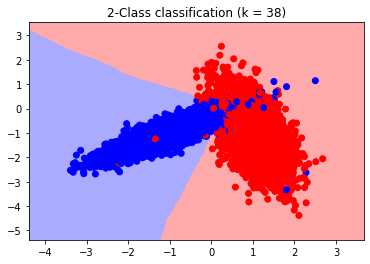

In [6]:
#optimal_neighbors=[26,38] #optimal neighbors from plot
optimal_neighbors=38

from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = optimal_neighbors)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)

In [7]:
print(len(X_test[:, 0]))
print(len(X_test[:, 1]))

2500
2500


In [8]:
def plot_decision_boundary(xt1,X1,xt2, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#ffcccb', '#AAFFAA', '#90ee90'])
    cmap_bold = ListedColormap(['red', '#00FF00', 'green'])

    x_min, x_max = xt1.min() - 1, xt1.max() + 1
    y_min, y_max = xt2.min() - 1, xt2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the testing points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

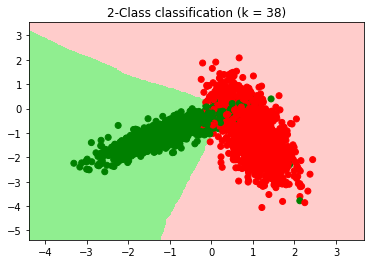

In [9]:

from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = optimal_neighbors)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0],X_test[:, 0], X_train[:, 1],X_test[:, 1], y_test, neigh)